<a href="https://colab.research.google.com/github/cgyireh1/Data-Preprocessing_Formative/blob/main/ml_pipeline_CarolineGyireh_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Empowering Girls In STEM
## EGiS 👩‍🏫

## Student Name: Caroline Gyireh

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   UCI Machine Learning Repository - [Link](https://archive.ics.uci.edu/)

   UNICEF Data - [Link](https://data.unicef.org/resources/resource-type/datasets/)

   Data.Gov - [link](https://data.gov/)

   Github


   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   Yes, data aggregation from multiple sources is necessary for comprehensive analysis because datasets obtained from a single source often provide a limited perspective. Aggregating data enables the combination of diverse datasets to fill gaps and address various aspects of the problem, creating a more holistic understanding of the project. For example, UNICEF provides global insights on gender disparities in education, but it might lack localized information on the implementation of STEM programs, which Data.Gov can provide. By combining these datasets, one can analyze the global while also understanding specific regional challenges.

   It also helps to cross-verify findings across multiple sources, reducing bias and improving the accuracy of the analysis. This ensures that the insights derived are not skewed by the limitations or scope of a single dataset. Additionally, the inclusion of varied and comprehensive inputs enhances the predictive capabilities of the analysis, making it possible to identify key factors influencing girls’ participation in STEM fields. Overall, aggregating data from these sources enables a more informed and data-driven approach to decision-making.


   ( Exlanation is Using my project of empowering girls in STEM)


In [ ]:
import pandas as pd
data = pd.read_csv("/content/Student_performance_data _.csv")
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

   The data is currently in a CSV format and with a total of 15 columns and 2392 entries. The data types include: int64 for categorical data and float64 for the continuous data.

   **Planned transformation:**
   - Data Cleaning,
   - Data Type Conversion,
   - Standardization and Scaling,
   - Feature Engineering
   - Data Restructuring

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
     - StudentID
    - Age  
    - Gender  
    - Ethnicity
    - ParentalEducation
    - StudyTimeWeekly
    - Absences
    - Tutoring
    - ParentalSupport
    - Extracurricular  
    - Sports  
    - Music
    - Volunteering
    - GPA
    - GradeClass

   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  From the findings, there are no outliers in the given data, the distribution of GPA appears to be somewhat normal, but with a slight skew, GPA and Absences, GradeClass tend to have a very strong negative correlation(If one variable increases, the other tends to decrease) and GradeClass and Absences have a strong positive correlation

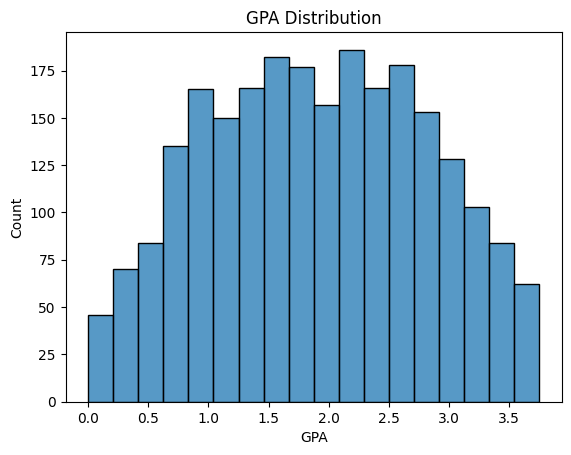

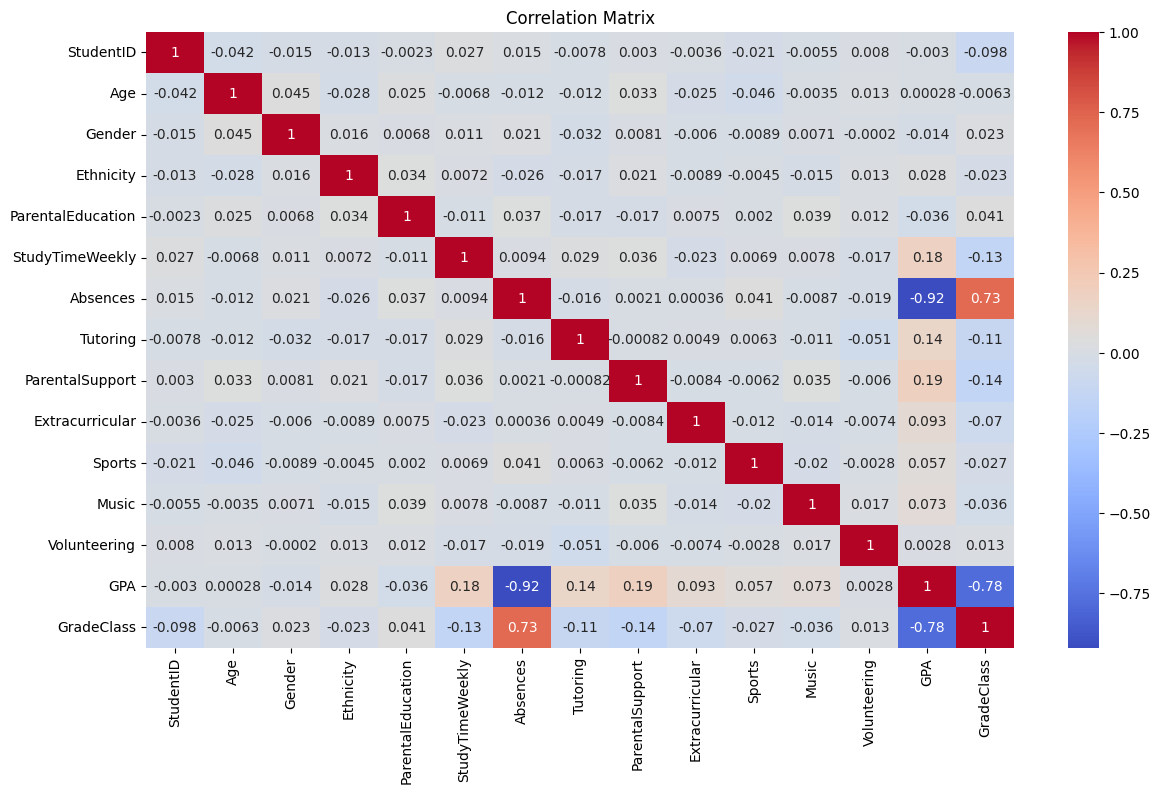

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots
sns.histplot(data['GPA']).set_title("GPA Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

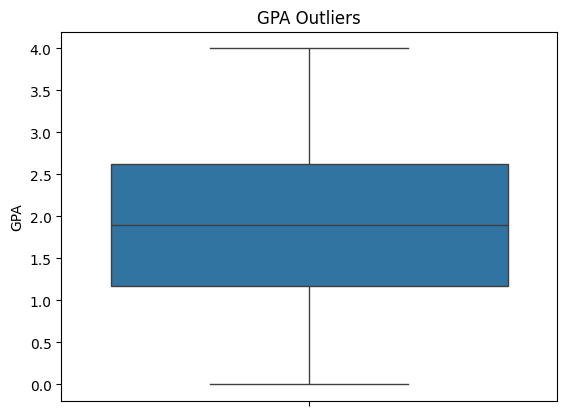

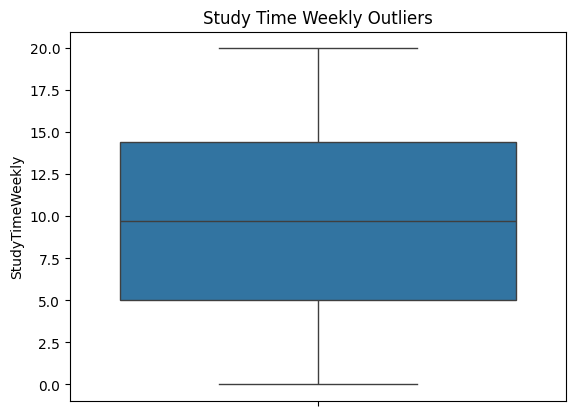

Outliers in GPA and StudyTimeWeekly: Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [ ]:
# Outliers
# Boxplot to show potential outliers in GPA
sns.boxplot(data['GPA']).set_title("GPA Outliers")
plt.show()

# Boxplot to show potential outliers in StudyTimeWeekly
sns.boxplot(data['StudyTimeWeekly']).set_title("Study Time Weekly Outliers")
plt.show()

# Identifying outliers using Z-scores (values above 3 or below -3 are considered outliers)
from scipy import stats

z_scores = stats.zscore(data[['GPA', 'StudyTimeWeekly']])
outliers = (abs(z_scores) > 3).all(axis=1)
outliers_data = data[outliers]
print("Outliers in GPA and StudyTimeWeekly:", outliers_data)




4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   **Preexisting Hypotheses**
   - Students who study more hours per week have a higher GPA
   - Students who receive parental support will have a higher GPA compared to those who do not
   - Students with fewer absences will have a higher GPA

   **Methodologies:**
   - **Correlation** can be applied to determine the strength and direction of the relationships.
     - Positive correlation supporting the first hypothesis and negative suppoorting the third.
   - A **t-test** can be used to compare the mean GPA of students with and without parental support.



5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   Missing Data:
  - Imputation: Using the mean, median, or mode to fill in the missing data if the missing dataset is more.
  - Deletion: Dropping the rows or columns with missing values if the missing data is minimal and randomly distributed.

  Outliers:
  - **Identify the outliers:** they can be identified using boxplots, the IQR method, or Z-scores.
  - **Handle the outliers:** they can be handled by capping them at a predefined threshold, such as the 99th percentile, reducing the influence of extreme values.


   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [ ]:
import numpy as np
from scipy import stats
# Identifying outliers using Z-scores

z_scores = stats.zscore(data[['GPA', 'StudyTimeWeekly']])
outliers = (abs(z_scores) > 3).all(axis=1)
outliers_data = data[outliers]
print("Outliers in GPA and StudyTimeWeekly:", outliers_data)

# Identifying outliers using the IQR method
Q1 = data[['GPA', 'StudyTimeWeekly']].quantile(0.25)
Q3 = data[['GPA', 'StudyTimeWeekly']].quantile(0.75)
IQR = Q3 - Q1

# Applying the IQR rule
outliers_iqr = ((data[['GPA', 'StudyTimeWeekly']] < (Q1 - 1.5 * IQR)) | (data[['GPA', 'StudyTimeWeekly']] > (Q3 + 1.5 * IQR)))
outliers_iqr_data = data[outliers_iqr.any(axis=1)]
print("Outliers based on IQR:", outliers_iqr_data)

# Handling outliers - Capping the outliers to the 99th percentile
cap_limit_gpa = data['GPA'].quantile(0.99)
cap_limit_study_time = data['StudyTimeWeekly'].quantile(0.99)

# Capping outliers in each column
data['GPA'] = data['GPA'].clip(upper=cap_limit_gpa)
data['StudyTimeWeekly'] = data['StudyTimeWeekly'].clip(upper=cap_limit_study_time)

# checking the adjusted dataset
print(data[['GPA', 'StudyTimeWeekly']].describe())

Outliers in GPA and StudyTimeWeekly: Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []
Outliers based on IQR: Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []
               GPA  StudyTimeWeekly
count  2392.000000      2392.000000
mean      1.904653         9.770594
std       0.911890         5.650289
min       0.000000         0.001057
25%       1.174803         5.043079
50%       1.893393         9.705363
75%       2.622216        14.408410
max       3.748511        19.720476


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

     - Training Set: Allocate 70-80% of the data for training the model.

     - Validation Set: Allocate 10-15% for the validation set to helps tune hyperparameters and check the model's performance during training.

     - Testing Set: Allocate the remaining 10-15% for the testing set to evaluate the models' performance on unseen data.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    - **Stratified Sampling:**
    It is used to ensure that the proportions of different classes or groups are maintained across the training, validation, and test sets when splitting the dataset. This prevents the model from being skewed by an unbalanced distribution.





Class Distribution:
 Gender
1    1222
0    1170
Name: count, dtype: int64


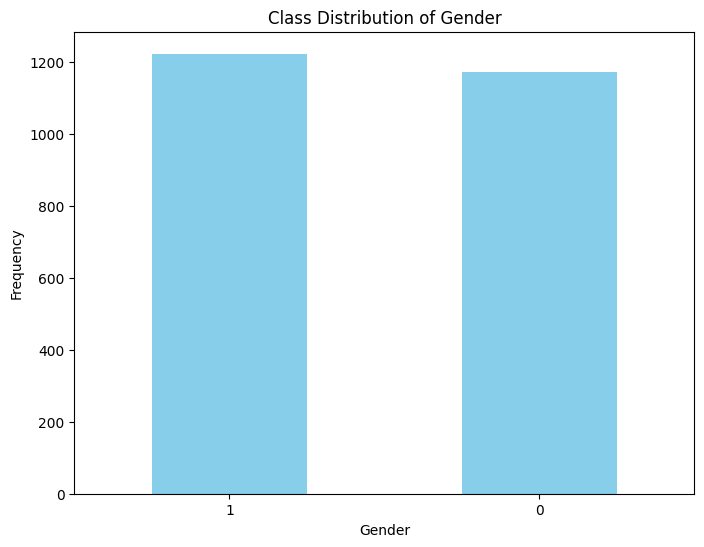

In [ ]:
target_column = 'Gender'

# Check the class distribution
class_distribution = data[target_column].value_counts()

# Print the distribution
print("Class Distribution:\n", class_distribution)

# Plot the distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title(f"Class Distribution of {target_column}")
plt.xlabel(target_column)
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Verifying the sizes of the datasets
print(f"Training Data: {train_data.shape}")
print(f"Validation Data: {val_data.shape}")
print(f"Testing Data: {test_data.shape}")

Training Data: (1913, 15)
Validation Data: (239, 15)
Testing Data: (240, 15)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Gender']):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

print(f"Training Data Shape: {train_data.shape}")
print(f"Testing Data Shape: {test_data.shape}")


Training Data Shape: (1913, 15)
Testing Data Shape: (479, 15)


8. **Features for Model Training:**
   - Identify relevant features for training the model.
    
    Ans:
    
    - GPA: This directly measure of academic performance, which has strong correlation with pursuing STEM careers.
    
    - ParentalEducation: Higher parental education correlates with better academic outcomes and more encouragement to pursue higher education, including STEM.

    - StudyTimeWeekly: This another strong predictor of academic success, which is crucial for STEM.

    - Tutoring: Indicates the student’s commitment to improving academic performance, which is critical for STEM success.
    - GradeClass: it is an overall measure of academic performance.

    - ParentalSupport: Strong parental support often correlates with academic success and the motivation to pursue STEM.

    - Gender: this is a relevant feature especially in analyzing how gender influences STEM career decisions.

    - Ethnicity: Can provide insights into how different groups are represented or face barriers in pursuing STEM.

    - Absences: High absenteeism is a strong predictor of academic challenges, and it can reduce a student's chance of succeeding in STEM.

    - Extracurricular: Participation in extracurricular activities indicates motivation and leadership qualities, but its impact on STEM is indirect.


   - Rank features based on their significance to project objectives.

    - GPA

    - ParentalSupport

    - Study Time
    
    - Tutoring
    
    - Parental Education.
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   **Categorical Data:** Gender, Ethnicity, ParentalEducation, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering.
    
    Preprocessing Steps:

    - Label Encoding: Convert categorical values into numerical labels (e.g. Male = 0, Female = 1).

    - One-Hot Encoding: Convert categorical columns into binary columns

   **Numerical Data:** Age, StudyTimeWeekly, Absences, GPA, GradeClass.

    Preprocessing:

    - Scaling/Normalization: Use Min-Max scaling or Standardization to ensure all numerical features are on the same scale.

    - Handling Missing Values: Impute missing values with the median (for skewed data) or mean (for normally distributed data).


In [ ]:
#print out relevant features
from sklearn.preprocessing import StandardScaler

# Applying Standard Scaler to numerical features
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'GradeClass']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


from sklearn.preprocessing import LabelEncoder

# Label Encoding categorical features
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Ethnicity'] = label_encoder.fit_transform(data['Ethnicity'])



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.
     - **Scaling/Normalization STEPS:**

        Standardization: This transforms data to have a mean of 0 and a standard deviation of 1. It's useful when the features have different units or magnitudes.

        Min-Max Scaling: Scales the data to a range of [0, 1] which is useful when you want all values within a uniform range.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.